# Data Mining Tutorial Week 6

In this tutorial, we will first learn calculating **$L_1$, $L_2$ and $L_\infty$ distance**, followed by calculating the **SSE** of the k-means result by Python. Then we introduce how to use the well-implemented **DBSCAN** algorithm and **AGNES (AgglomerativeClustering)** algorithm in **scikit-learn**. 

## Part 1: calculating the $L_1$, $L_2$ and $L_\infty$ distance

In this part, we give two three-dimensional points: (1, 0, 5) and (2, 4, 9) and see how to calculate the $L_1$, $L_2$ and $L_\infty$ distance.Please refer to https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html for more details.

Before that, please calculate by hand the 3 distances between these two points. Then we start coding:

In [1]:
# importing library
import numpy as np

# define two points
a = np.array([1, 0, 5])
b = np.array([2, 4, 9])

L1 = np.linalg.norm((a - b), ord=1) # ord = 1 for L1
L2 = np.linalg.norm((a - b))        # default value of  ord =2 for L2
Linfinity = np.linalg.norm((a - b), np.inf) # L_infty is setting infinity
print("The value of L1 norm is " + str(L1))
print("The value of L2 norm is " + str(L2))
print("The value of L_infty norm is " + str(Linfinity))

The value of L1 norm is 9.0
The value of L2 norm is 5.744562646538029
The value of L_infty norm is 4.0


Is your by-hand calculating correct?

## Part 2: Calculating the SSE

In this part, we will learn how to calculate the SSE both by hand-written code and well-implemented code. 

We first load the data in *dummy_data.csv*, which contains 300 two-dimensional points. 

In [2]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load data
data_frame = pd.read_csv('dummy_data.csv')

# print(data_frame.head(3))

X = data_frame[['x', 'y']].values # create the targer array about x and y
print('loading successfully')

loading successfully


We then do k-means on the data.

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state= 1) # Set the total number of the cluster, i.e, k,to be 8
# ***Note that for running k-means, the first step is to randomly select several data points as the "initial" center points. 
# ***Thus we fix the random_state to be the random seed 1, such that the results can be reproducible. 

km = kmeans.fit(X) # Compute k-means clustering

print('kmeans successfully')

kmeans successfully


Let us recall how to calcualte the SSE and write code to do it.

In [4]:
# Let us calculate the SSE according to the definition
y_kmeans = kmeans.predict(X) # get the clustering result
centers = kmeans.cluster_centers_ # get the clustering centers

label = 0; 
SSE = 0;
for center in centers: # for each cluster center
    X_current_cluster = X[y_kmeans == label] # get the data in the cluster
    for x in X_current_cluster: # for each data
        SSE = SSE + pow(np.linalg.norm((x - center), ord=2),2) # pow means power
        # calcualte the square of distance and add to SSE
    label=label+1; # update the label for the next cluster

print('SSE of the kmeans clustering by hand-written code is, ' + str(SSE))

SSE of the kmeans clustering by hand-written code is, 137.41595888700994


In [5]:
centers

array([[ 1.51478   ,  4.54176067],
       [ 1.54231872,  1.01318846],
       [-1.73102256,  7.43349907],
       [-1.19105758,  3.20054818],
       [-0.89248   ,  8.18394312],
       [-1.89342786,  2.54030667],
       [ 0.57303978,  4.33727533],
       [ 2.45953611,  0.71011333]])

If we refer to https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html, we can see the description of the Attribute **inertia_** which is: *sum of squared distances of samples to their closest cluster center*. That is exactly what we want for SSE. Let us use this value to test whether our hand-written code is correct.

In [5]:
SSE_cluster = km.inertia_
print('SSE of the kmeans clustering by inertia_ is, ' + str(SSE_cluster))

SSE of the kmeans clustering by inertia_ is, 137.41595888700994


Great! They are equal.

## Part 3: Hierarchical-based Clustering (AGNES)

In this part, we will learn how to use the well-implemented AGNES algorithm to do hierarchical clusterings. Please refer to https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html for details on the **AgglomerativeClustering** algorithm.

We then plot the dengrogram by the algorithm **dendrogram**. For details, please refer to https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram.

As always, we first load the data in *wholesale_customers.csv*:

In [6]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# loading data
data = pd.read_csv('wholesale_customers.csv')

# showing the first three lines of the data
data.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


Before applying the hierarchical clustering, we would first normalise our data so that the model does not become biased towards variables with high magnitude. To normalize our data, we use the well-implmented algorithm **normalize**. For details, please refer to https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html.

In [7]:
#normalising data
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns) # Framing data array

# showing the first three lines of the data
data_scaled.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619


## Task 1: Using **AgglomerativeClustering** to do clustering

There are some key points to use the **AgglomerativeClustering** method, we need to specify the following parameters:
1. The distance function used, which is determined by the attribute **affinity**. We use 'euclidean' distance. Please try 'manhattan' for the $L_1$ distance.
2. The way to update the distances between clusters, determined by the attribute **linkage**. We use 'complete'. Please try 'single' or 'average'.
3. The number of clusters you need in the final output, determined by the attribute **n_clusters**. We set it as 3. 

Please refer to https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html for details. 

In [8]:
# Here, we can use linkage = 'single' for min hierarchical clustering and 'average' for avg hierarchical clustering
# the data will be clustered into 3 clusters, with Euclidean distance, and complete linkage:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  

#  The clusteriong result of data
y_predict = cluster.fit_predict(data_scaled)
print(y_predict)

[1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1
 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 2 1
 1 1 2 0 1 0 1 0 1 1 1 0 0 1 2 1 1 1 0 2 0 0 0 2 2 1 1 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0
 1 2 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0
 2 2 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 0 0 0 1 0 1 2 0 0 1 0 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 0 0 0 0 0 0 1 1 0 2 1 0 1 1 0 1 0 1 0 0 1 1 1 1 2 1 0 1 1 1 0 1
 0 1 1 1 1 2 2 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 2 0 1 0 1 1 1 2 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 2 1 1 0 0 0 1 0 1 1 1 1 2 1 1 0 1 0 2 1 0 1 1 1 0 1 1]


We can see the values of 0, 1, and 2, assign the data points to three clusters. They tell us which cluster each datapoint belongs to. 

**Exercise:** running hierarchical clustering for the data 'spiral.csv' in Week 5 Tutorial.Plot the result and see which linkage method can successfully cluster the data. 

## Task 2: Using **dendrogram** to do clustering and plot the dengrogram

Let us now try to visualise the data by dendrogram using the well-implemented algorithm **dendrogram**. For details, please refer to https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py.

To specify the parameters of distance used and linkage function, we use the method *linkage*, with details: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

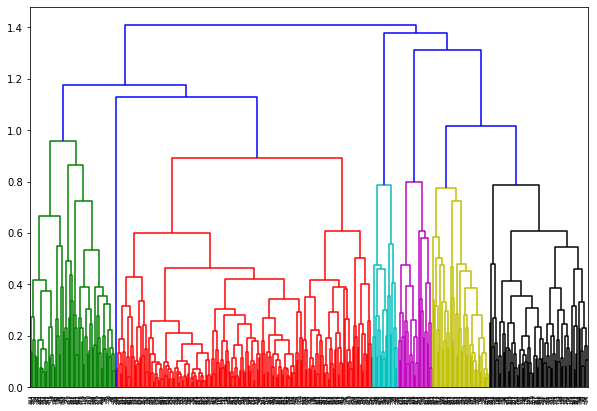

In [9]:
plt.figure(figsize=(10, 7))  
plt.title=("Dendrograms_complete_max") 

# complete linkage and euclidean distance
dend_max = shc.dendrogram(shc.linkage(data_scaled, method='complete', metric='euclidean'))

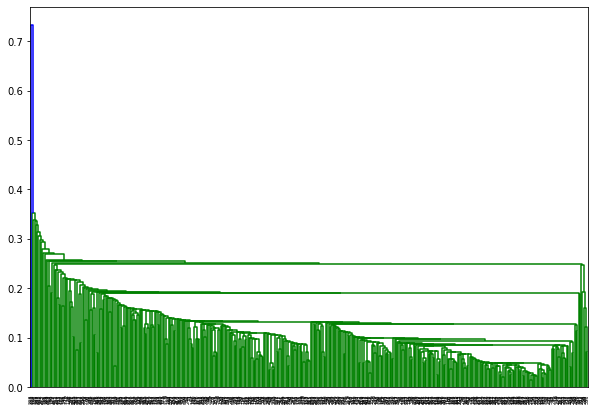

In [10]:
plt.figure(figsize=(10,7))
plt.title=("Dendrogram_single_min")
dend_min = shc.dendrogram(shc.linkage(data_scaled, method='single', metric='euclidean'))

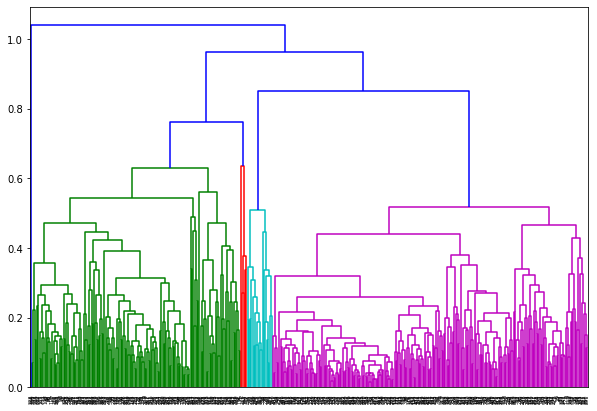

In [11]:
plt.figure(figsize=(10,7))
plt.title=("Dendrogram_average")
dend_avg = shc.dendrogram(shc.linkage(data_scaled, method='average', metric='euclidean'))

The x-axis has all our data points, and the y-axis is the distance between them.If we draw a line on the dendrogram: 

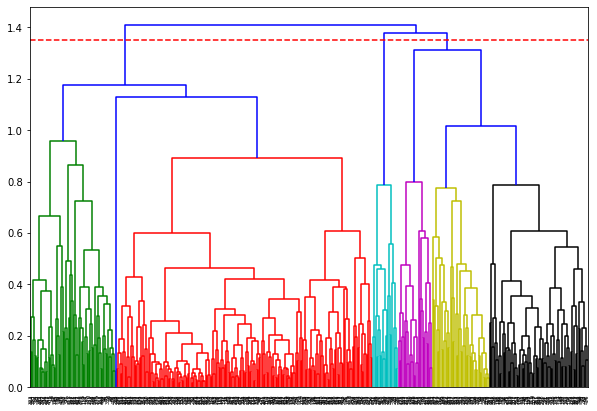

In [12]:
plt.figure(figsize=(10, 7))  
plt.title=("Dendrograms")
dend_single = shc.dendrogram(shc.linkage(data_scaled, method='complete'))

# draw a line with height 1.35
plt.axhline(y=1.35, color='r', linestyle='--')

The red line in the above dendogram is specified at such a distance that it divides the dendogram into three different clusters.




## Part 4: Density-based Clustering (DBSCAN)

In this part,we load the toy data in *dummy_spiral.csv*, normalise its values. We then apply the well-implemented DBSCAN algorithm. For details, refer to https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html. 

In [13]:
# import necessary packages.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from pandas import DataFrame

# load the data
data = pd.read_csv('dummy_spiral.csv')
X = data[['x', 'y']].values 

# normalize the data
# X = StandardScaler().fit_transform(X)

# predict using DBSCAN with Eps = 0.2 and minPts = 10
y_pred = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)

print(y_pred)

[ 0  1  0  1  1  0  0  0  1  0  0  1  1  1  1  1  0  0  1  1  0  0  0  0
  0  1  1  1  0  1  0  0  0  1  0  1  0  0  0  0  1  0  0  0  0  1  0  1
  1  1  0  0  0  0  0  1  1  0  0  1  1  0  0  0  1  1  1  1  1  0  1  0
  0  0  0  1  0  0  0  0  1  0  0  0  0  1  1  0  1  0  0  0  1  1  1  1
  0  1  0  1  1  0  1  1  0  0  0  0  0  1  1  1  0  0  0  0  1  1  0  0
  0  1  0  1  0  0  1  1  0  1  0  1  0  0  1  0  1  1  1  1  1  1  1  1
  0  1  0  0  0  0  0  1  0  0  1  1  0  0  1  1  0  1  0  0  1  0  0  1
  0  0  0  0  0  1  1  0  1  0  0  1  1  0  0  0  1  0  0  0  1  0  0  1
  0  0  1  1  0  1  1  1  0  1  0  1  1  1  1  0  1  1  0  1  0  0  1  1
  1  0  0  0  0  0  0  1  1  0  0  1  0  0  1  0  1  0  0  0  0  1  1  0
  0  1  0  0  0  1  0  0  1  1  1  0  1  1 -1  0  1  1  0  1  1  0  1  0
  0  1  0  1  1  0  1  1  0  1  0  0  0  1  0  0  0  1  0  0  1  1  1  1
  1  1  0  1  0  1  1  1  0  1  0  0  1  1  1  1  0  0  1  0  0  1  1  1
  0  0  1  1  0  0  1  0  0  0  1  0  1  1  0  0  1

The values shown are -1, 0, 1, where -1 denotes the point is a noisy point. 0 and 1 specify two clusters the points belong to. 

Number of clusters: 2


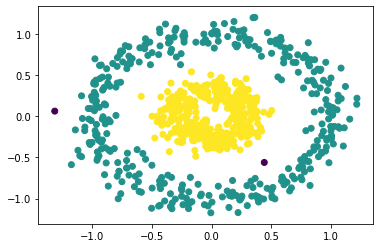

In [14]:
# Plot the results
plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))

**Exercise:** running DBSCAN for the data 'spiral.csv' in Week 5 Tutorial.Plot the result and see whether DBSCAN can successfully cluster the data. 